In [ ]:
#Movie Recommendation System

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
ft=pd.read_csv('movie.csv')
ft.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
column_names=['user_id','item_id','rating','timestamp']
fr=pd.read_csv('u.data',sep='\t',names=column_names)
fr.head(5)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [97]:
fmerg=pd.merge(ft,fr,how='inner',on='item_id')
fmerg

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
...,...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1,889289570
99999,1679,B. Monkey (1998),863,3,889289491
100000,1680,Sliding Doors (1998),863,2,889289570
100001,1681,You So Crazy (1994),896,3,887160722


In [98]:
copydf=fmerg.copy()
copydf

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
...,...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1,889289570
99999,1679,B. Monkey (1998),863,3,889289491
100000,1680,Sliding Doors (1998),863,2,889289570
100001,1681,You So Crazy (1994),896,3,887160722


In [100]:
df_num=pd.DataFrame(fmerg.groupby('title')['rating'].mean())
df_num

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [101]:
df_count=pd.DataFrame(fmerg.groupby('title')['user_id'].count())
df_count.rename(columns={'user_id':'number of ratings'},inplace=True)
df_count

,number of ratings
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
...,...
Young Guns II (1990),44
"Young Poisoner's Handbook, The (1995)",41
Zeus and Roxanne (1997),6


In [102]:
newdf=pd.merge(df_num,df_count,how='inner',on='title')
newdf

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [79]:
import matplotlib.pyplot as plt

In [80]:
import matplotlib as mpl

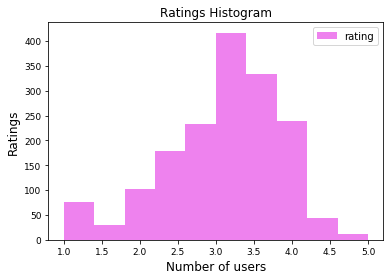

In [103]:
newdf.plot(kind='hist',x='number of ratings',y='rating',color='VIOLET',width=0.4)
plt.xlabel('Number of users',fontsize=12)
plt.ylabel('Ratings',fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('Ratings Histogram')
plt.show()

In [104]:
df_mat=copydf.pivot_table(index='user_id',values='rating',columns='title')
df_mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
#Selecting Starwars column
starwars=df_mat['Star Wars (1977)']
starwars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [106]:
#Selecting Dumb & Dumber
dumbrate=df_mat['Dumb & Dumber (1994)']
dumbrate

user_id
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
939   NaN
940   NaN
941   NaN
942   NaN
943   NaN
Name: Dumb & Dumber (1994), Length: 944, dtype: float64

In [107]:
#Calculating Correlation with starwars
check_cor1=df_mat.corrwith(starwars)
cor1=pd.DataFrame(check_cor1,columns=['correlation'])
cor1.dropna(inplace=True)
cor1.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [108]:
#Calculation of correltion on dumb & dumber
check_cor2=df_mat.corrwith(dumbrate)
cor2=pd.DataFrame(check_cor2,columns=['correlation'])
cor2.dropna(inplace=True)
cor2.head()

,correlation
title,
101 Dalmatians (1996),0.566122
12 Angry Men (1957),-0.359896
2 Days in the Valley (1996),0.229958
"20,000 Leagues Under the Sea (1954)",0.337723
2001: A Space Odyssey (1968),0.149512


In [109]:
#Star Wars-->Adding the ratings column to the new dataframe
cor1=cor1.join(newdf['number of ratings'])
cor1.head(5)

,correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [110]:
#Star Wars-->choosing ratings more than 100 and SORTING based on correlation
cor1[cor1['number of ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [111]:
#Merging ratings column to dumb and dumber df
cor2=cor2.join(newdf['number of ratings'])
cor2.head()

,correlation,number of ratings
title,,
101 Dalmatians (1996),0.566122,109
12 Angry Men (1957),-0.359896,125
2 Days in the Valley (1996),0.229958,93
"20,000 Leagues Under the Sea (1954)",0.337723,72
2001: A Space Odyssey (1968),0.149512,259


In [93]:
#Dumb & Dumber-->choosing ratings more than 100 and SORTING based on correlation
cor2[cor2['number of ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,number of ratings
title,,
George of the Jungle (1997),0.717496,162
Happy Gilmore (1996),0.679419,149
Kolya (1996),0.624758,117
Scream 2 (1997),0.599336,106
"Hudsucker Proxy, The (1994)",0.598297,110


In [112]:
#Doing same for liar liar
liar_movie=df_mat['Liar Liar (1997)']
liar_movie

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

In [113]:
check_cor3=df_mat.corrwith(liar_movie)
cor3=pd.DataFrame(check_cor3,columns=['corr'])
cor3.dropna(inplace=True)
cor3.head()

,corr
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [114]:
cor3=cor3.join(newdf['number of ratings'])
cor3.head()

,corr,number of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [115]:
cor3[cor3['number of ratings']>100].sort_values('corr',ascending=False).head(20)

,corr,number of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


In [116]:
#Those movies with least correlation values is the most similiar movies